In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from qolmat.analysis.holes_characterization import PKLMTest

In [2]:
def generate_randunif(N=500):
    Z = np.random.uniform(0,1, N)

    X = np.sort(Z)
    F = np.array(range(N))/float(N)
    
    return X, F

In [3]:
def create_df_with_nan(n_rows: int, n_cols: int, nan_ratio: float) -> pd.DataFrame:
    data = {f"Colonne_{i}": np.random.normal(size=n_rows).astype(float) for i in range(n_cols)}
    df = pd.DataFrame(data)
    nb_valeurs_manquantes = int(nan_ratio * df.size)
    indices_valeurs_manquantes = np.random.choice(df.size, nb_valeurs_manquantes, replace=False)
    df.values.flat[indices_valeurs_manquantes] = np.nan
    return df

In [14]:
N_sim = 500
list_res_exact = []
list_res_approximation = []

for _ in range(N_sim):
    df = create_df_with_nan(500, 10, 0.35).to_numpy()
    pklm_test_exact = PKLMTest(
        nb_projections=100,
        nb_permutation=30,
        nb_trees_per_proj=200,
        exact_p_value=True
    )
    pklm_test_approximation = PKLMTest(
        nb_projections=100,
        nb_permutation=30,
        nb_trees_per_proj=200,
        exact_p_value=False
    )
    list_res_exact.append(pklm_test_exact.test(df))
    list_res_approximation.append(pklm_test_approximation.test(df))

In [15]:
Z_pv_exact = np.array(list_res_exact, dtype=np.float32)
X_pv_exact = np.sort(Z_pv_exact)
F_pv = np.array(range(N_sim))/float(N_sim)

Z_pv_approximation = np.array(list_res_approximation, dtype=np.float32)
X_pv_approximation = np.sort(Z_pv_approximation)

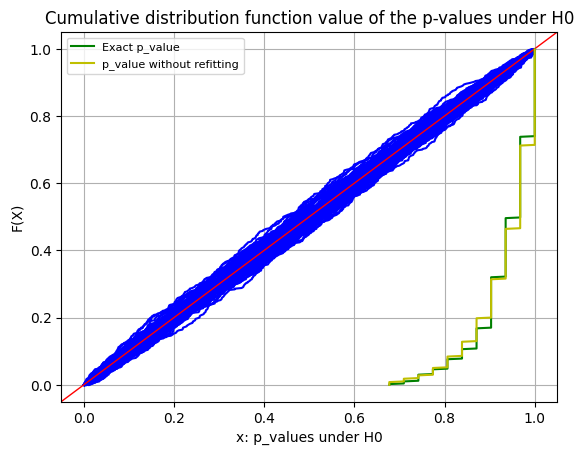

In [16]:
fig, ax = plt.subplots()

for _ in range(100):
    X, F = generate_randunif()
    plt.plot(X, F, 'b')
    
ax.axline((0, 0), (1, 1), linewidth=1, color='r')
plt.plot(X_pv_exact, F_pv, 'g', label="Exact p_value")
plt.plot(X_pv_approximation, F_pv, 'y', label="p_value without refitting")

plt.legend(
    loc='upper left',
    fontsize=8,
)
plt.xlabel("x: p_values under H0")
plt.ylabel("F(X)")
plt.title("Cumulative distribution function value of the p-values under H0")
plt.grid()
plt.show()